# Autoregressive Integrated Moving Average (ARIMA) , ARIMA (p,d,q)

- ARIMA stands for Autoregressive Integrated Moving Average Model. It belongs to a class of models that explains a given time series based on its own past values.

- ARIMA Models are specified by three order parameters: (p, d, q). p is the order of the AR (autoregression) term, q is the order of the MA (Moving Average) term and d is the number of differencing required to make the time series stationary.

- AR(p) Autoregression – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.

- I(d) Integration – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.

- MA(q) Moving Average – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

# 1) Checking trend of Malaysia daily cases

In [1]:
import numpy as np
import pandas as pd

In [2]:
read_file = pd.read_excel ("case.xlsx")

In [3]:
read_file.to_csv ("case.csv", 
                  index = None,
                  header=True)
    

df = pd.DataFrame(pd.read_csv("case.csv")) 

#df1 = pd.DataFrame(pd.read_csv("Malaysia_cases.csv", header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser,sep = ';'))

In [4]:
df.head(3)

,Date,daily
0,2020-01-26,0
1,2020-01-27,0
2,2020-01-28,0


In [5]:
df.tail(3)

,Date,daily
530,2021-07-09,9180
531,2021-07-10,9353
532,2021-07-11,9105


In [7]:
df.shape

(533, 2)

- We checking daily and weekly trend

<ipython-input-8-3c33b4488071>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


         Date  daily
0  2020-01-26      0
1  2020-01-27      0
2  2020-01-28      0
3  2020-01-29      3
4  2020-01-30      1


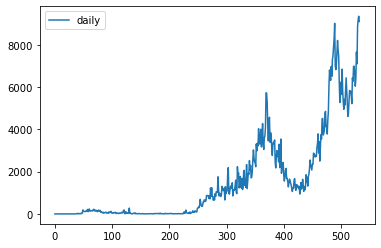

In [8]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

print(df.head())
df.plot()
pyplot.show()

<ipython-input-9-2748c90b0852>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


                 daily
Date                  
2020-01-26    0.000000
2020-02-02    0.571429
2020-02-09    1.285714
2020-02-16    0.714286
2020-02-23    0.000000
2020-03-01    1.000000
2020-03-08   10.000000
2020-03-15   47.000000
2020-03-22  125.428571
2020-03-29  166.285714
2020-04-05  170.285714
2020-04-12  145.857143
2020-04-19  100.857143


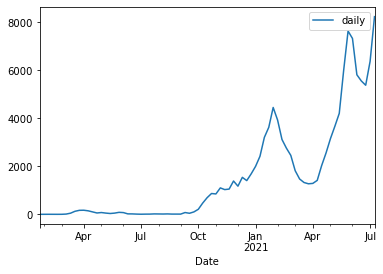

In [9]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d') 

read_file.to_csv ("case.csv", 
                  index = None,
                  header=True)
    

df1 = pd.DataFrame(pd.read_csv("case.csv", header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser))
resample = df1.resample('W')
weekly_mean = resample.mean()
print(weekly_mean.head(13))
weekly_mean.plot()
pyplot.show()

- We can see that the Malaysia's daily cases data has a clear trend and doesn't have seasonality.This suggests that the time series is not stationary and will require differencing to make it stationary.

# 2) Identify if the data is stationary

Data is stationarity when the mean, variance and covariance of data is constant over periods.

# i) Augmented Dickey Fuller test (ADF Test) 

Ho: Data is non-stationary
H1: Data is stationary

Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series. When the test statistic is lower than the critical value shown, you reject the null hypothesis and infer that the time series is stationary.

In [10]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.daily.dropna())
print('p-value: %f' % result[1])

p-value: 0.993922


P-value is greater than 0.05, so data is accepting the null hypothesis, which means data is non-stationary

# ii) Autocorrelation Function (ACF) Plot

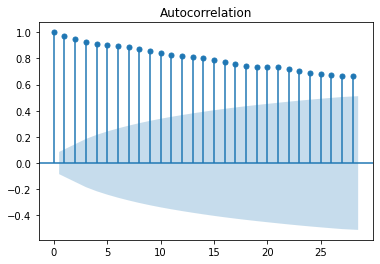

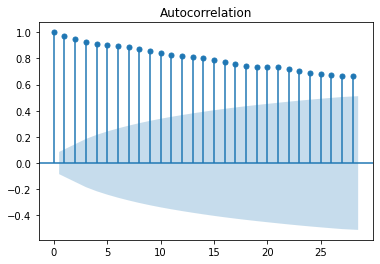

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['daily'])

Autocorrelation Function (ACF) is a function that gives the values of auto-correlation of any series with its lagged values. When the ACF of the original data was plotted, we can see that the ACF plot dampens down toward 0 very slowly. This means that the time series is not stationary. Thus, differencing is required to obtain a stationary time series.For a stationary time series, the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly.

# 3) Differencing , d

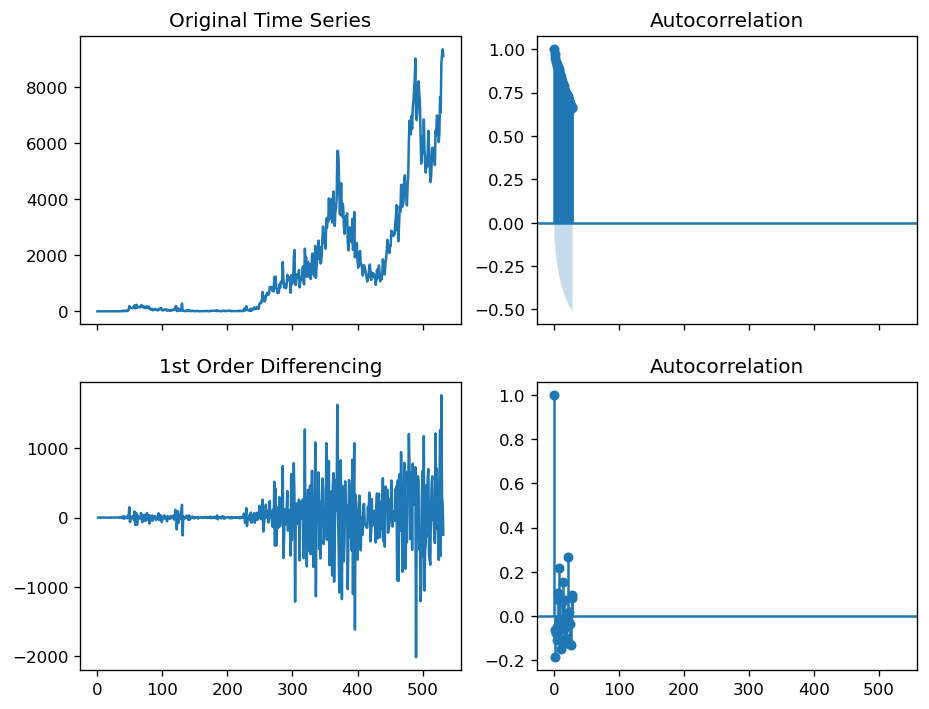

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Time Series
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(df.daily); axes[0, 0].set_title('Original Time Series')
plot_acf(df.daily, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.daily.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.daily.diff().dropna(), ax=axes[1, 1])


plt.show()

- For the above data, we can see that the time series already stationarity with first  order of differencing

- We can check stationary of the first differenced data with ADF:

In [13]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
diff1 = df.daily.diff(periods = 1)
result = adfuller(diff1.dropna())
print('p-value: %f' % result[1])

p-value: 0.000021


- P-value is less than 0.05, which means data is stationary. So, our d term is 1.

# 4) AutoRegression Term, p 

- Autocorrelation function (ACF). At lag k, this is the correlation between series values that are k intervals apart.


- Partial autocorrelation function (PACF). At lag k, this is the correlation between series values that are k intervals apart, accounting for the values of the intervals between.

- We will find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

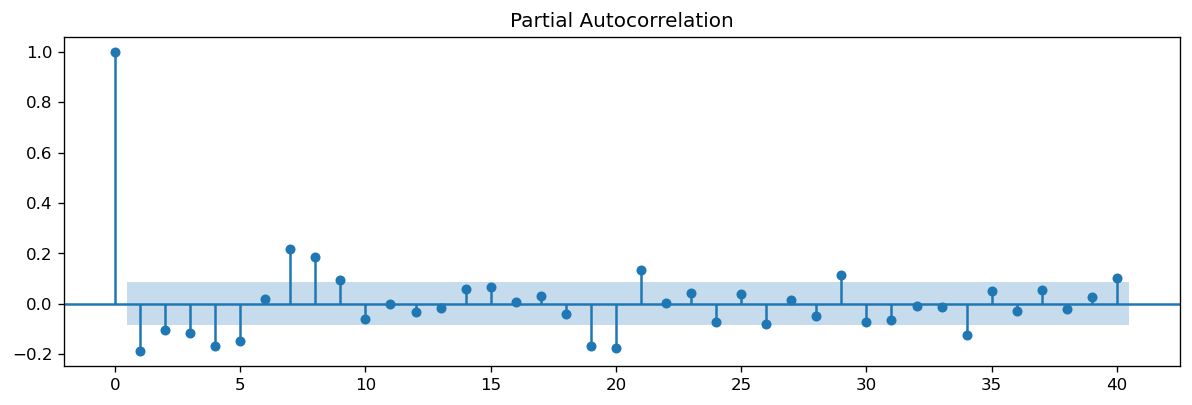

In [14]:
# PACF plot of 1st differenced series

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(diff1.dropna(),lags=40,ax=ax1)

- We can see from PACF plot, a few of lags are well above the significance line. 

# 5) Moving Average term, q

- We will look at the ACF plot for the number of MA terms. An MA term is the error of the lagged forecast.

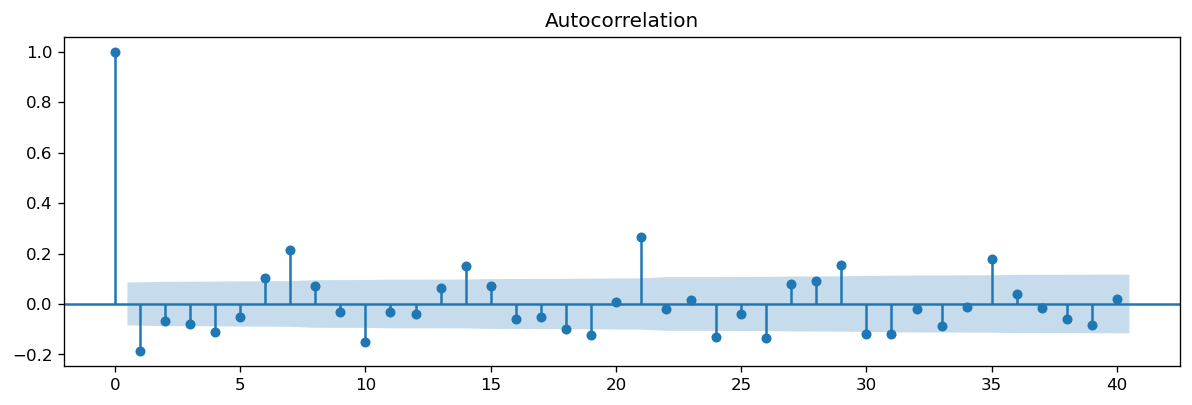

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1.dropna(),lags=40,ax=ax1)

- We can see also from the ACF plot, a few of lags are well above the significance line.

- From observation from the acf and pacf plot, we can't decide the best p and q term because a few lags are well above the significance line. We only know our d term is 1. So, we use auto_arima to find the optimum model.

# 6) Find Optimum ARIMA Model

- auto_arima() uses a stepwise approach to search the multiple ARIMA models and chooses the best model that has the least Akaike’s Information Criterion(AIC).

- The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data

In [16]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df.daily,trace= True, error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7777.030, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7814.167, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7797.051, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7791.229, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7813.287, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7782.114, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7781.868, Time=0.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7721.831, Time=1.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7778.708, Time=0.70 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=7711.279, Time=1.78 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7771.097, Time=0.66 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=7712.848, Time=1.66 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=7709.913, Time=1.64 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=7715.456, Time=1.75 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept

# 7) Prediction and Forecasting using ARIMA Model

In [17]:
print(df.shape)

(533, 2)


- Split data to train and test data. Approximately 70% train data and 30% test data

In [18]:
# splitting dataset into train and test sets
train = df.daily[:400]
test = df.daily[400:]

- We will look prediction of model from auto_arima

- We will plotting of prediction plot

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

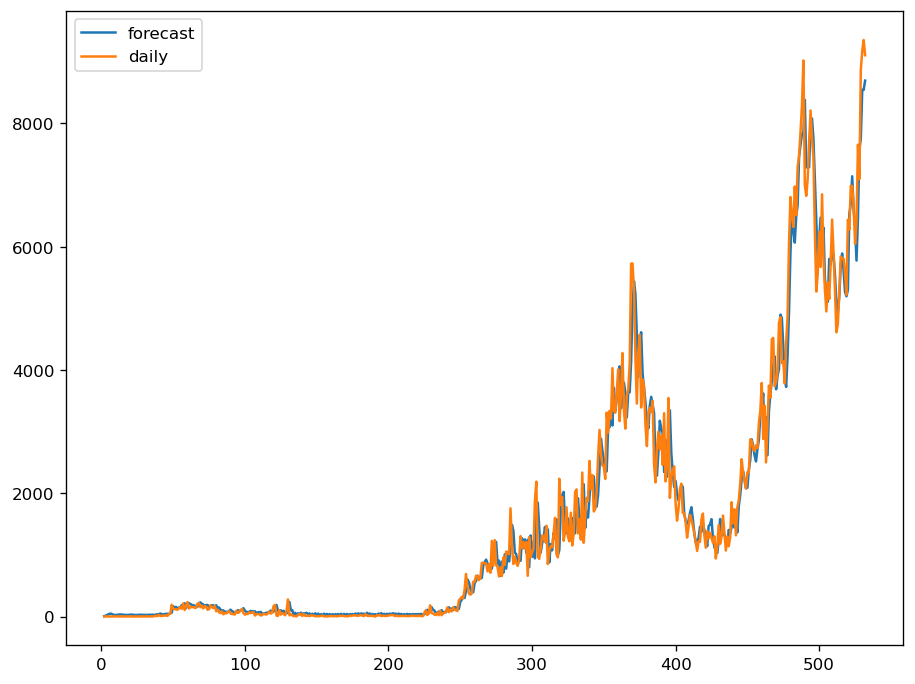

In [20]:
from statsmodels.tsa.arima_model import ARIMA

# df['daily'].dropna(inplace=True)
mod=ARIMA(df['daily'],order=(5,1,3))
mod_fit=mod.fit()
mod_fit.plot_predict(dynamic=False)
plt.show()

- Then, we will look at prediction plot from 1/03/2021 until 11/07/2021 (test set)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  wa

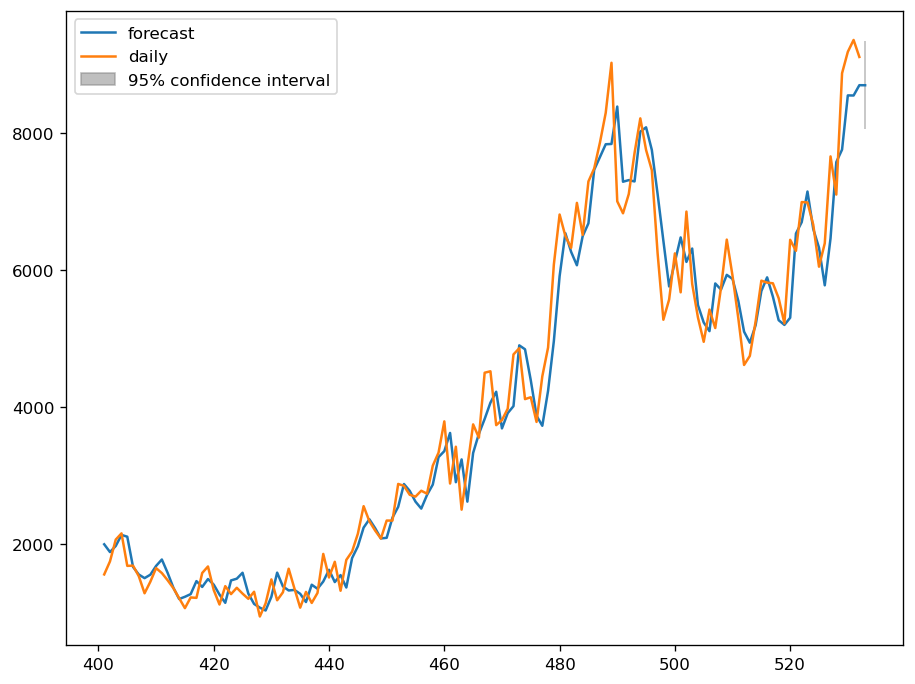

In [21]:
from statsmodels.tsa.arima_model import ARIMA

# df['daily'].dropna(inplace=True)
mod=ARIMA(df['daily'],order=(5,1,3))
mod_fit=mod.fit()
mod_fit.plot_predict(dynamic=False,start=401,end=533)
plt.show()

- Then, we check our prediction error of our test set using roor mean squared error

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predict = mod_fit.predict(dynamic=False,start=401,end=533)
rmse = sqrt(mean_squared_error(predict,test))
print(rmse)

4742.100508599653


- We will forecast Malaysia's daily cases 10 days onward

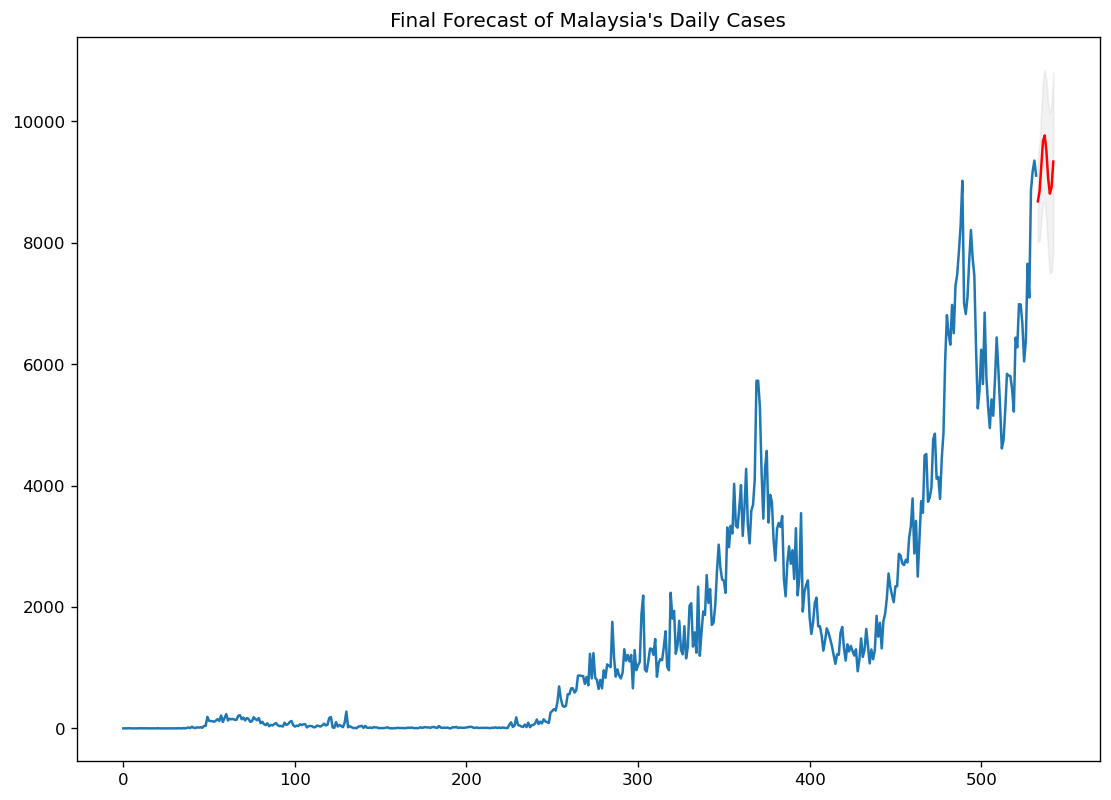

In [24]:
# Forecasting 10 ddays onward
n_periods = 10
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.daily), len(df.daily)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(11, 8))
plt.plot(df.daily)
plt.plot(fc_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.05) #95% CI

plt.title("Final Forecast of Malaysia's Daily Cases")
plt.show()